In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# Set the style for better visualizations
plt.style.use('seaborn')
sns.set_palette("husl")


C:\Users\priya\AppData\Local\Temp\ipykernel_3028\4177457194.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [3]:
# Read the data
df = pd.read_csv('spending_data.csv')


In [4]:
# Basic data exploration
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nBasic Statistics:")
print(df.describe())

Dataset Shape: (100000, 10)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      100000 non-null  object 
 1   Customer ID         100000 non-null  object 
 2   Transaction Date    100000 non-null  object 
 3   Transaction Amount  100000 non-null  float64
 4   Merchant Category   100000 non-null  object 
 5   Transaction Type    100000 non-null  object 
 6   Customer Age        100000 non-null  int64  
 7   Customer Gender     100000 non-null  object 
 8   Customer Income     100000 non-null  float64
 9   Customer Location   100000 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 7.6+ MB
None

Missing Values:
Transaction ID        0
Customer ID           0
Transaction Date      0
Transaction Amount    0
Merchant Category     0
Transaction Type      0
Customer Age       

In [5]:
# Convert Transaction Date to datetime
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])



In [7]:
# Create time-based features
df['Month'] = df['Transaction Date'].dt.month
df['Day of Week'] = df['Transaction Date'].dt.day_name()

#### 1. Age Distribution Analysis

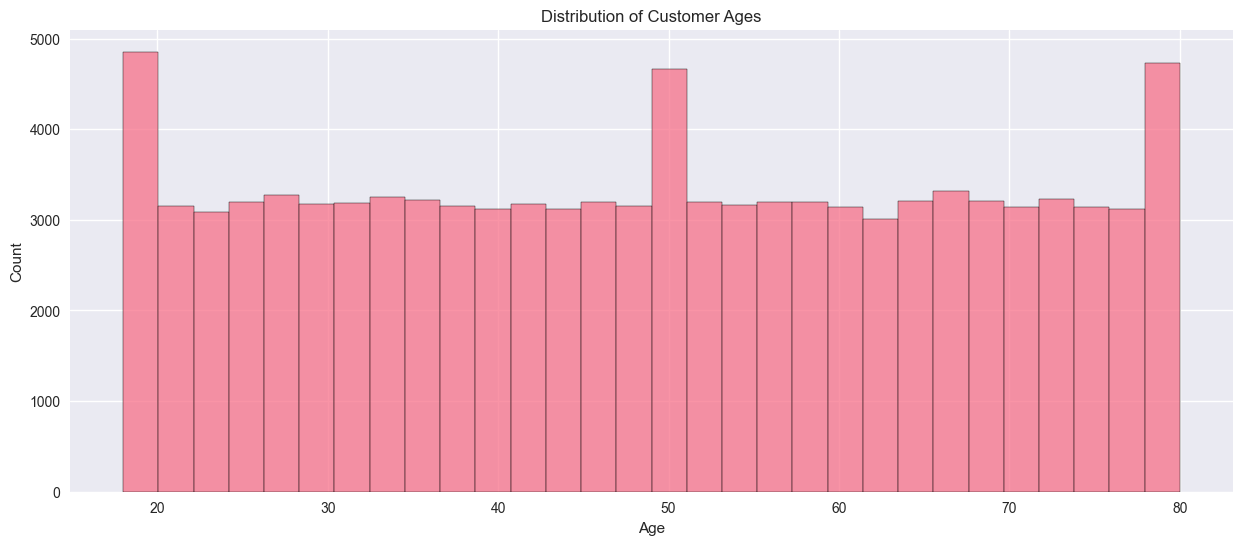

In [10]:

plt.figure(figsize=(15, 6))
sns.histplot(data=df, x='Customer Age', bins=30)
plt.title('Distribution of Customer Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Age groups for further analysis
df['Age Group'] = pd.cut(df['Customer Age'], 
                        bins=[0, 24, 34, 44, 54, 100],
                        labels=['18-24', '25-34', '35-44', '45-54', '55+'])

In [9]:
# Age groups for further analysis
df['Age Group'] = pd.cut(df['Customer Age'], 
                        bins=[0, 24, 34, 44, 54, 100],
                        labels=['18-24', '25-34', '35-44', '45-54', '55+'])

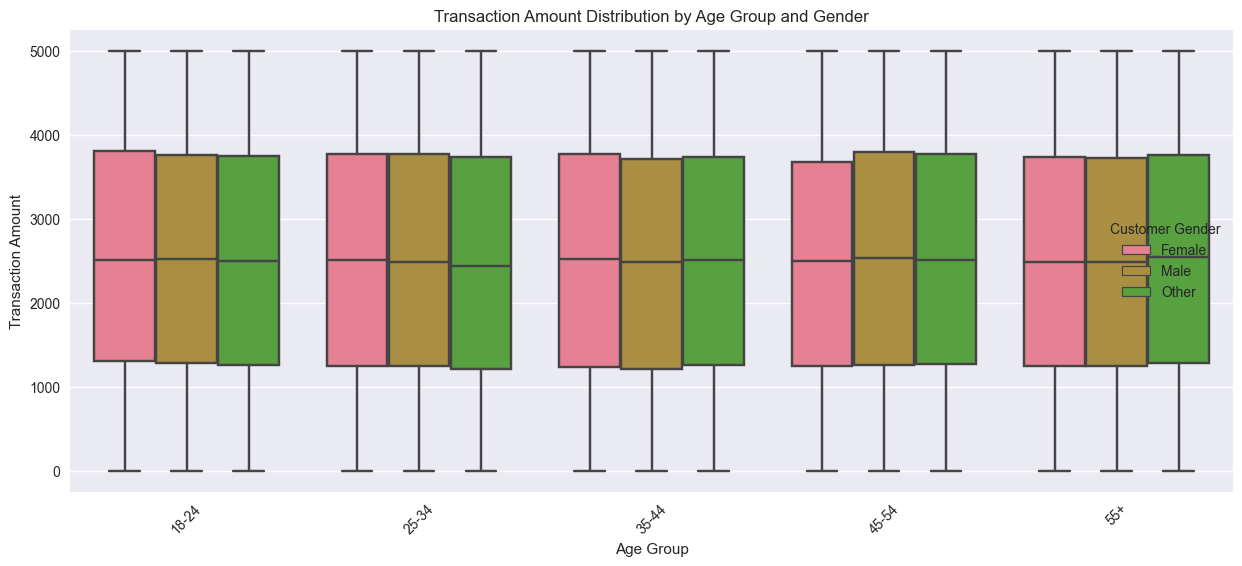

In [11]:
# 2. Spending by Age Group and Gender
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x='Age Group', y='Transaction Amount', hue='Customer Gender')
plt.title('Transaction Amount Distribution by Age Group and Gender')
plt.xticks(rotation=45)
plt.show()

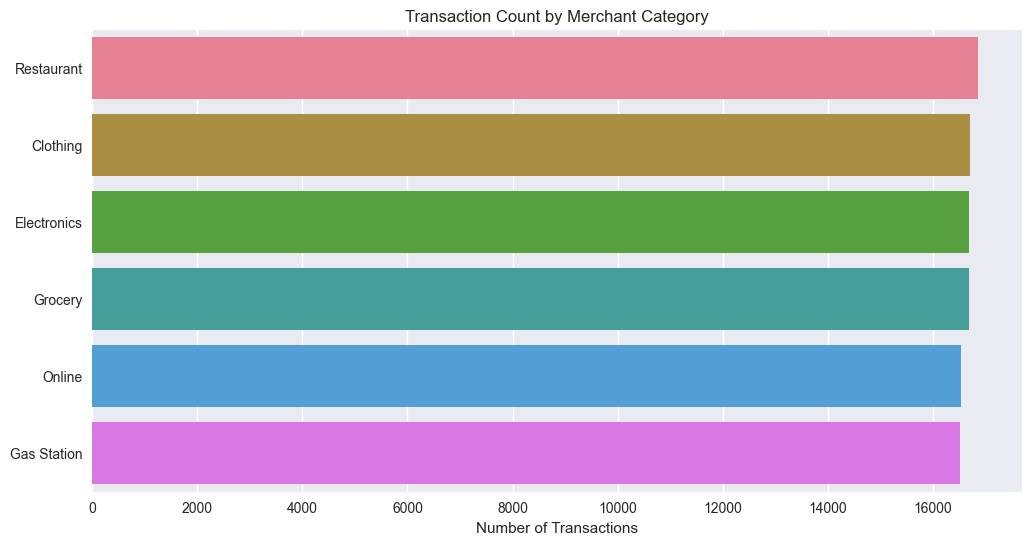

In [12]:
#3. Merchant Category Analysis
plt.figure(figsize=(12, 6))
category_counts = df['Merchant Category'].value_counts()
sns.barplot(x=category_counts.values, y=category_counts.index)
plt.title('Transaction Count by Merchant Category')
plt.xlabel('Number of Transactions')
plt.show()

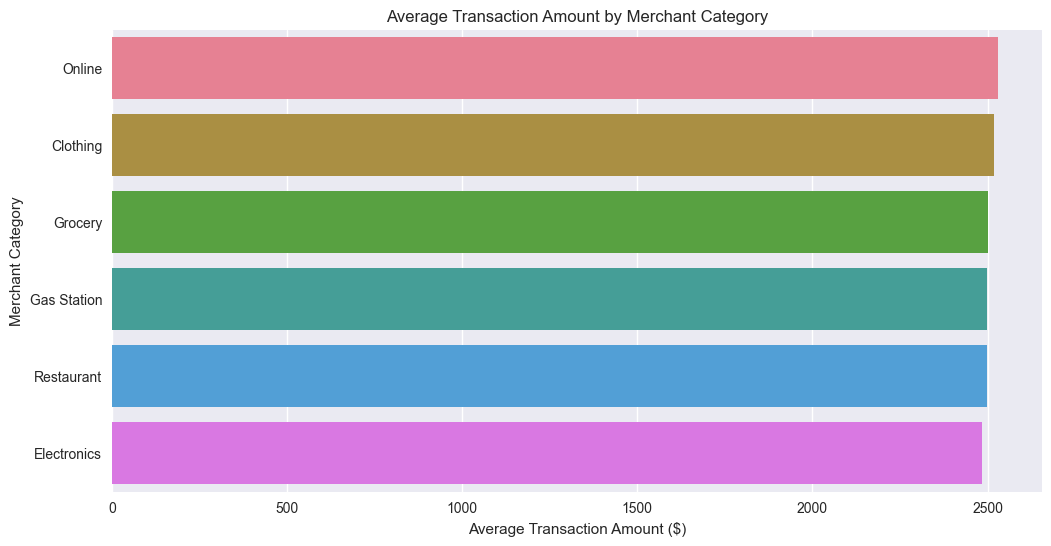

In [15]:
# 4. Average Transaction Amount by Merchant Category
plt.figure(figsize=(12, 6))
avg_amount = df.groupby('Merchant Category')['Transaction Amount'].mean().sort_values(ascending=False)
sns.barplot(x=avg_amount.values, y=avg_amount.index)
plt.title('Average Transaction Amount by Merchant Category')
plt.xlabel('Average Transaction Amount ($)')
plt.show()

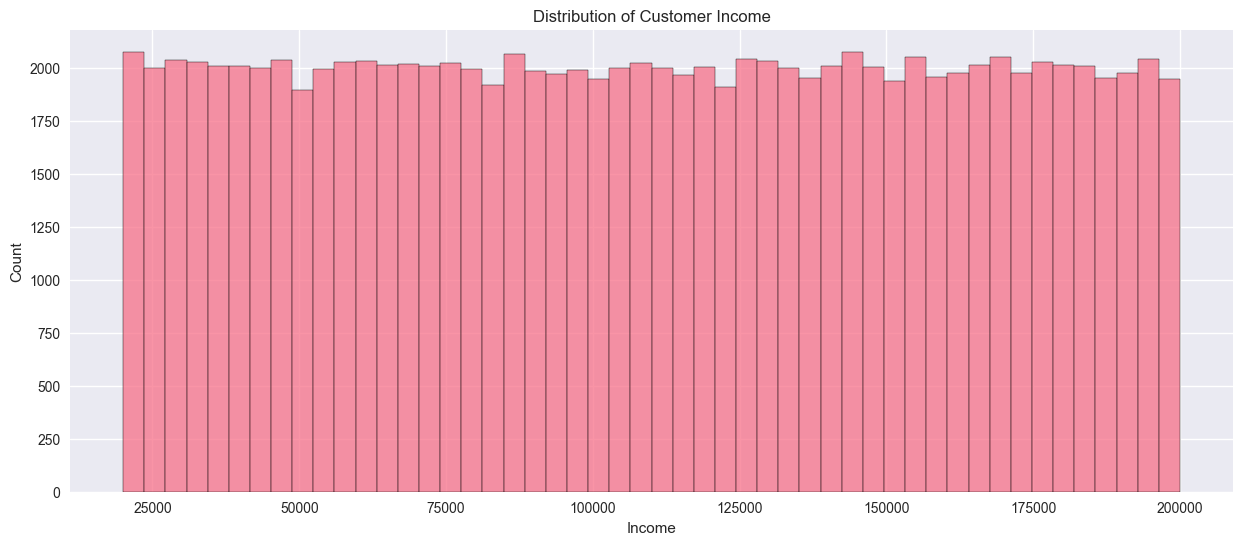

In [16]:
# 5. Income Distribution Analysis
plt.figure(figsize=(15, 6))
sns.histplot(data=df, x='Customer Income', bins=50)
plt.title('Distribution of Customer Income')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

In [17]:
# Create income brackets
df['Income Bracket'] = pd.cut(df['Customer Income'],
                             bins=[0, 30000, 60000, 100000, float('inf')],
                             labels=['< 30k', '30k-60k', '60k-100k', '100k+'])

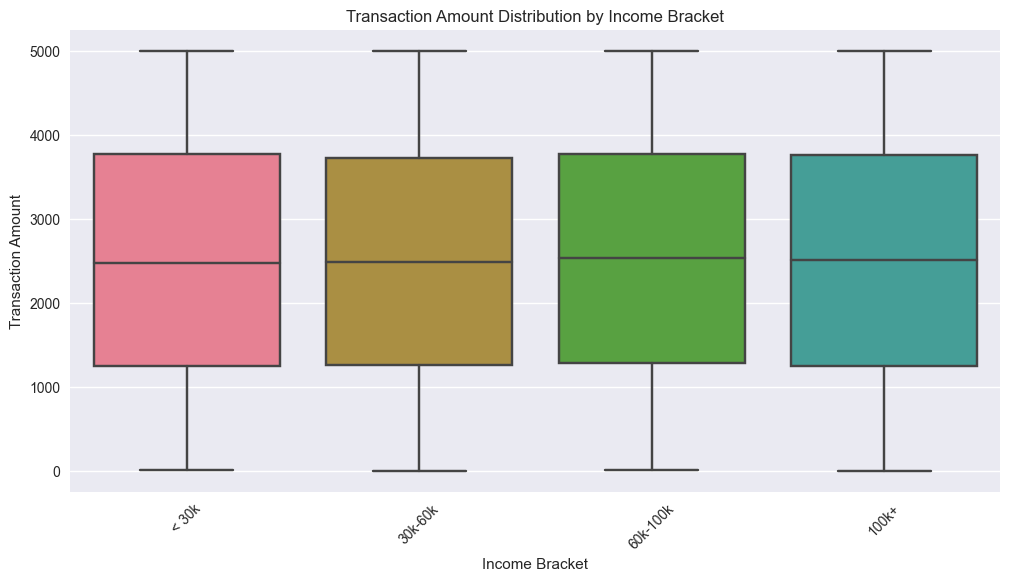

In [18]:
# 6. Spending Patterns by Income Bracket
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Income Bracket', y='Transaction Amount')
plt.title('Transaction Amount Distribution by Income Bracket')
plt.xticks(rotation=45)
plt.show()

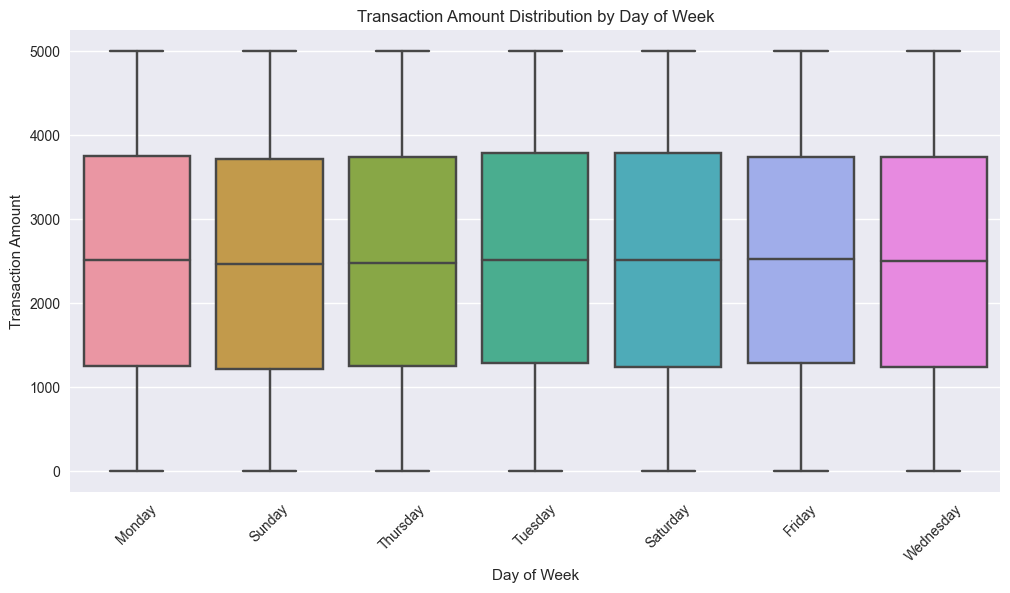

In [19]:
# 7. Daily Transaction Patterns
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Day of Week', y='Transaction Amount')
plt.title('Transaction Amount Distribution by Day of Week')
plt.xticks(rotation=45)
plt.show()

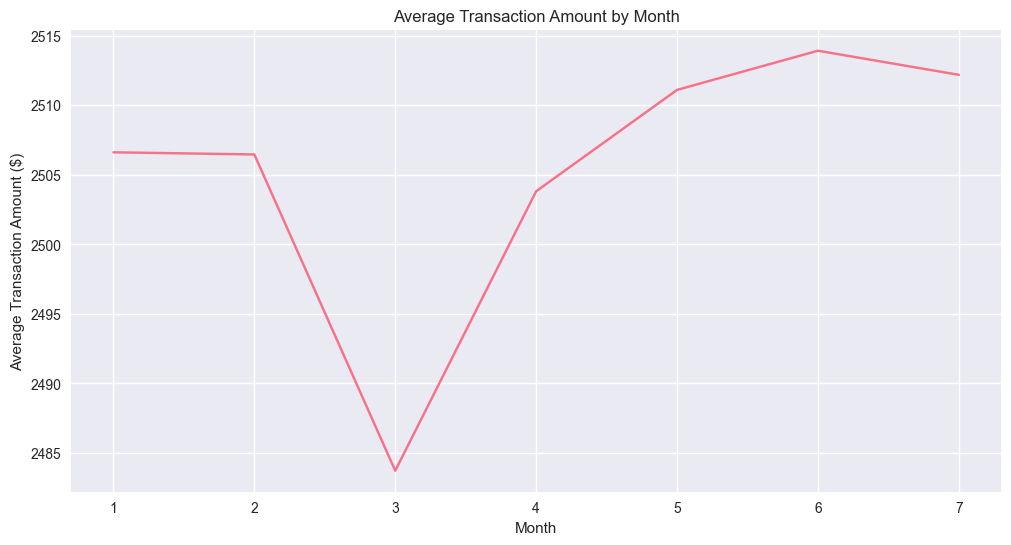

In [20]:
# 8. Monthly Transaction Patterns
plt.figure(figsize=(12, 6))
monthly_avg = df.groupby('Month')['Transaction Amount'].mean()
sns.lineplot(x=monthly_avg.index, y=monthly_avg.values)
plt.title('Average Transaction Amount by Month')
plt.xlabel('Month')
plt.ylabel('Average Transaction Amount ($)')
plt.show()

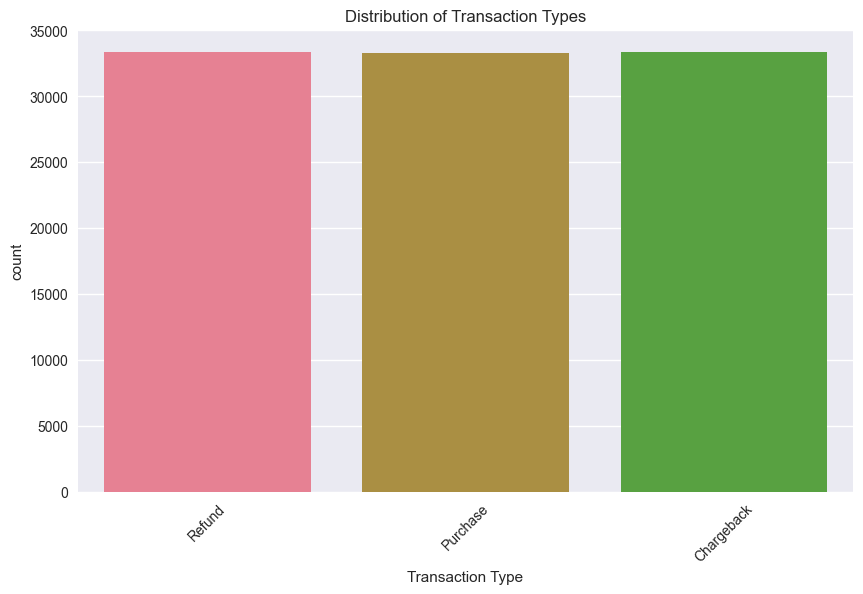

In [21]:
#9. Transaction Type Analysis
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Transaction Type')
plt.title('Distribution of Transaction Types')
plt.xticks(rotation=45)
plt.show()

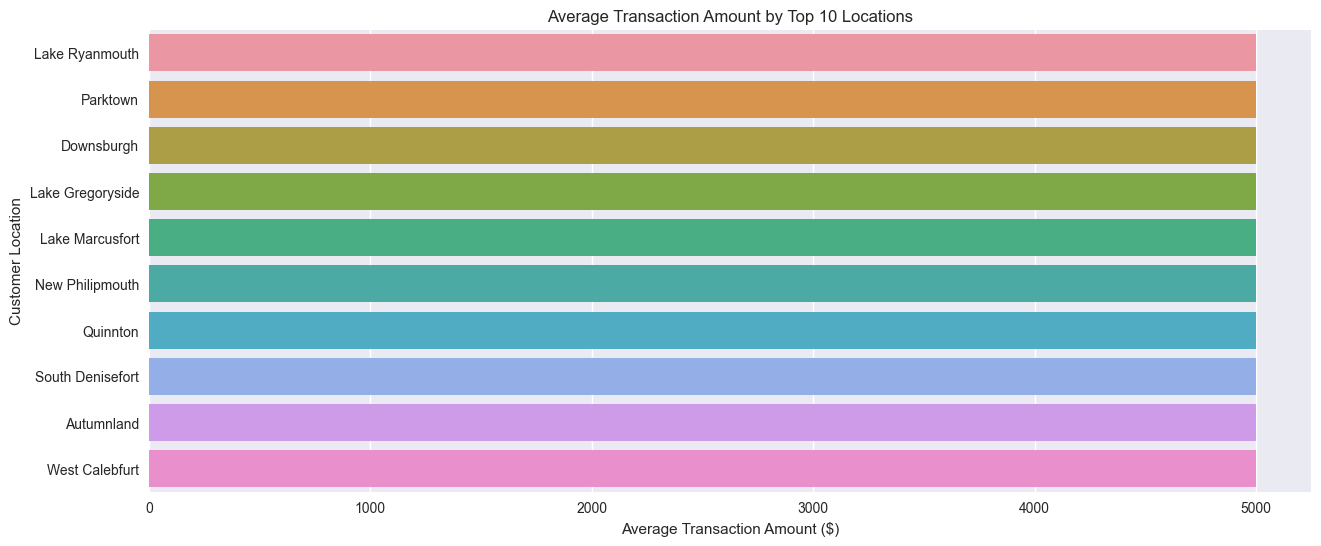

In [22]:
# 10. Location-based Analysis
plt.figure(figsize=(15, 6))
location_avg = df.groupby('Customer Location')['Transaction Amount'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=location_avg.values, y=location_avg.index)
plt.title('Average Transaction Amount by Top 10 Locations')
plt.xlabel('Average Transaction Amount ($)')
plt.show()

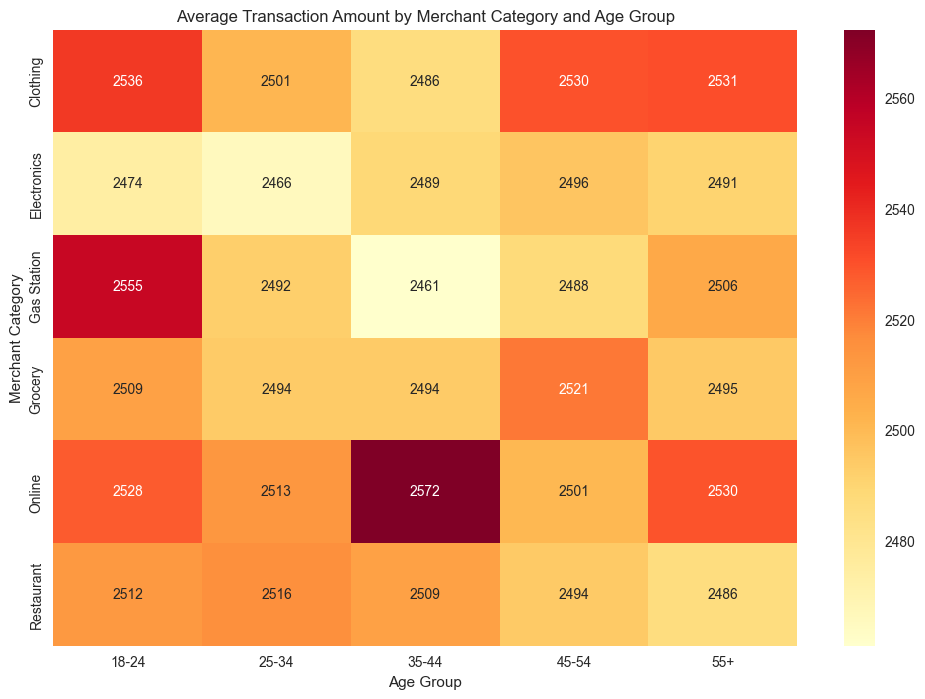

In [23]:
# 11. Heatmap of Transaction Amount Correlations
pivot_table = df.pivot_table(
    values='Transaction Amount',
    index='Merchant Category',
    columns='Age Group',
    aggfunc='mean'
)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='YlOrRd')
plt.title('Average Transaction Amount by Merchant Category and Age Group')
plt.show()

In [25]:
# 12. Statistical Summary by Key Segments
summary_stats = df.groupby(['Age Group', 'Customer Gender']).agg({
    'Transaction Amount': ['mean', 'median', 'std', 'count'],
    'Customer Income': 'mean'
}).round(2)

print("\nDetailed Statistical Summary by Age Group and Gender:")
summary_stats


Detailed Statistical Summary by Age Group and Gender:


Transaction Amount                           \
                                        mean   median      std  count   
Age Group Customer Gender                                               
18-24     Female                     2535.53  2517.70  1449.11   3701   
          Male                       2526.69  2520.28  1438.39   3674   
          Other                      2495.58  2496.44  1437.90   3717   
25-34     Female                     2518.97  2517.31  1446.05   5368   
          Male                       2498.49  2492.41  1444.41   5445   
          Other                      2472.72  2444.10  1446.54   5262   
35-44     Female                     2518.20  2529.32  1442.73   5370   
          Male                       2485.63  2490.83  1442.67   5171   
          Other                      2500.86  2506.78  1435.76   5242   
45-54     Female                     2488.13  2504.80  1420.53   5297   
          Male                       2521.18  2533.57  1454.02   5211   
          Other                      2505.66  2508.27  1439.12   5258   
55+       Female                     2498.80  2484.68  1439.81  13626   
          Male                       2493.12  2487.04  1436.27  13738   
          Other                      2526.91  2542.49  1441.10  13920   

                          Customer Income  
                                     mean  
Age Group Customer Gender                  
18-24     Female                109225.67  
          Male                  108746.52  
          Other                 110375.67  
25-34     Female                110701.00  
          Male                  109502.74  
          Other                 109686.13  
35-44     Female                109213.09  
          Male                  109233.56  
          Other                 110013.60  
45-54     Female                110469.30  
          Male                  110867.63  
          Other                 110068.99  
55+       Female                109874.30  
          Male                  110315.04  
          Other                 109249.13

In [26]:
# Save insights to a text file
with open('spending_analysis_insights.txt', 'w') as f:
    f.write("Key Insights from Spending Data Analysis:\n\n")
    
    # Age-based insights
    age_stats = df.groupby('Age Group')['Transaction Amount'].agg(['mean', 'count'])
    f.write("1. Age Distribution Insights:\n")
    for idx, row in age_stats.iterrows():
        f.write(f"   - {idx}: {row['count']} transactions, Average spending ${row['mean']:.2f}\n")
    
    # Gender-based insights
    gender_stats = df.groupby('Customer Gender')['Transaction Amount'].mean()
    f.write("\n2. Gender-Based Spending Patterns:\n")
    for gender, avg in gender_stats.items():
        f.write(f"   - {gender}: Average spending ${avg:.2f}\n")
    
    # Merchant category insights
    merchant_stats = df.groupby('Merchant Category')['Transaction Amount'].agg(['mean', 'count']).sort_values('count', ascending=False)
    f.write("\n3. Top Merchant Categories:\n")
    for idx, row in merchant_stats.head().iterrows():
        f.write(f"   - {idx}: {row['count']} transactions, Average spending ${row['mean']:.2f}\n")

In [29]:
df.head()

,Transaction ID,Customer ID,Transaction Date,Transaction Amount,Merchant Category,Transaction Type,Customer Age,Customer Gender,Customer Income,Customer Location,Month,Day of Week,Age Group,Income Bracket
0,TXN1000000,CUST1144,2024-02-05,1154.17,Clothing,Refund,30,Female,54800.0,Tranville,2,Monday,25-34,30k-60k
1,TXN1000001,CUST2063,2024-01-07,4232.30,Restaurant,Purchase,21,Male,39949.0,Lake Williefort,1,Sunday,18-24,30k-60k
2,TXN1000002,CUST2130,2024-03-10,1630.74,Gas Station,Refund,69,Other,122072.0,South Tammyshire,3,Sunday,55+,100k+
3,TXN1000003,CUST7597,2024-05-02,335.72,Electronics,Purchase,57,Other,90891.0,Port Jeremy,5,Thursday,55+,60k-100k
4,TXN1000004,CUST1234,2024-07-04,1410.51,Gas Station,Refund,40,Male,150545.0,Wrightville,7,Thursday,35-44,100k+


In [35]:
df['Customer ID'].value_counts()

CUST9075    27
CUST1932    26
CUST9168    24
CUST8959    24
CUST6885    24
            ..
CUST7260     2
CUST4497     2
CUST2622     2
CUST7766     2
CUST9445     2
Name: Customer ID, Length: 9000, dtype: int64

C:\Users\priya\AppData\Local\Temp\ipykernel_3028\1581102535.py:33: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


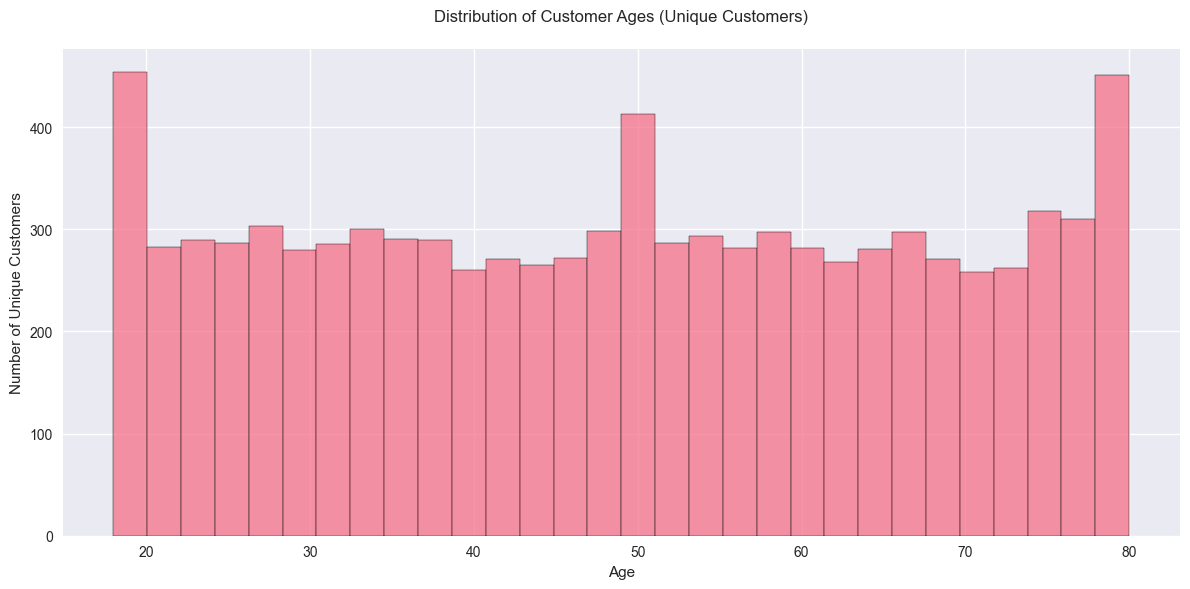

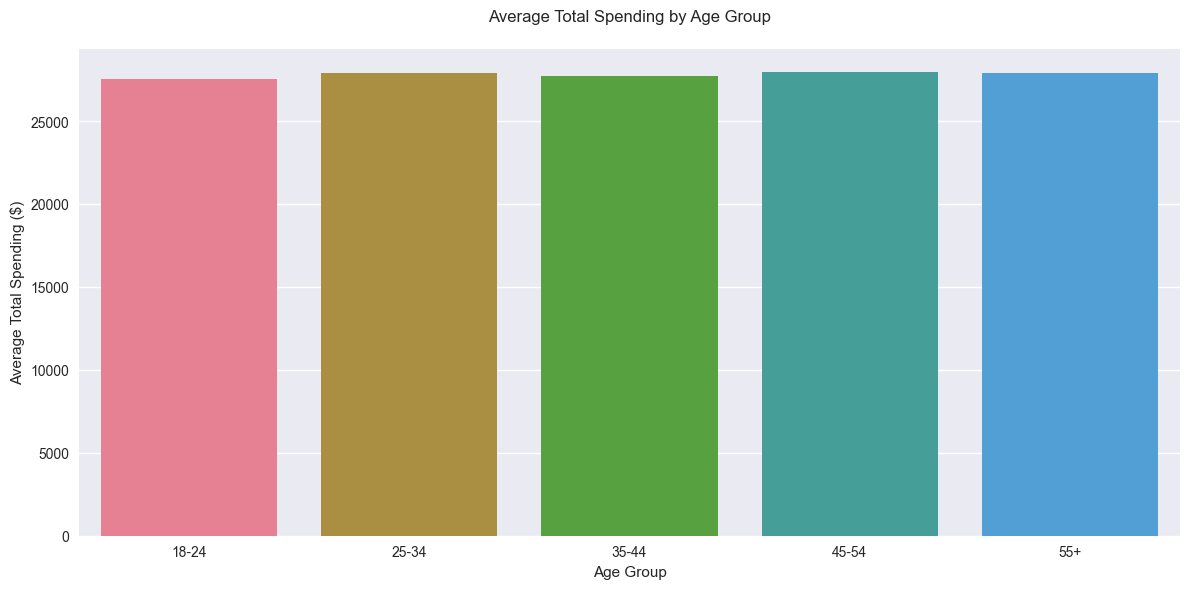

ValueError: Could not interpret input 'count'

<Figure size 1200x600 with 0 Axes>

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data
df = pd.read_csv('spending_data.csv')

# First, let's group by Customer ID to get unique customer metrics
customer_metrics = df.groupby('Customer ID').agg({
    'Customer Age': 'first',  # Demographics won't change per customer
    'Customer Gender': 'first',
    'Customer Income': 'first',
    'Customer Location': 'first',
    'Transaction Amount': ['count', 'mean', 'sum']
}).reset_index()

# Rename columns for clarity
customer_metrics.columns = ['Customer ID', 'Age', 'Gender', 'Income', 'Location', 
                          'Transaction_Count', 'Avg_Transaction', 'Total_Spent']

# Create age groups
customer_metrics['Age Group'] = pd.cut(customer_metrics['Age'], 
                                     bins=[0, 24, 34, 44, 54, 100],
                                     labels=['18-24', '25-34', '35-44', '45-54', '55+'])

# Create income brackets
customer_metrics['Income Bracket'] = pd.cut(customer_metrics['Income'],
                                          bins=[0, 30000, 60000, 100000, float('inf')],
                                          labels=['< 30k', '30k-60k', '60k-100k', '100k+'])

# Set the style
plt.style.use('seaborn')
sns.set_palette("husl")

# 1. Unique Customer Age Distribution
plt.figure(figsize=(12, 6))
plt.clf()
sns.histplot(data=customer_metrics, x='Age', bins=30)
plt.title('Distribution of Customer Ages (Unique Customers)', pad=20)
plt.xlabel('Age')
plt.ylabel('Number of Unique Customers')
plt.tight_layout()
plt.show()

# 2. Average Spending by Age Group
plt.figure(figsize=(12, 6))
plt.clf()
age_group_avg = customer_metrics.groupby('Age Group')['Total_Spent'].mean().reset_index()
sns.barplot(data=age_group_avg, x='Age Group', y='Total_Spent')
plt.title('Average Total Spending by Age Group', pad=20)
plt.xlabel('Age Group')
plt.ylabel('Average Total Spending ($)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 3. Customer Distribution by Income Bracket
plt.figure(figsize=(12, 6))
plt.clf()
income_dist = customer_metrics['Income Bracket'].value_counts().reset_index()
sns.barplot(data=income_dist, x='Income Bracket', y='count')
plt.title('Number of Customers by Income Bracket', pad=20)
plt.xlabel('Income Bracket')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

# 4. Average Spending by Income Bracket
plt.figure(figsize=(12, 6))
plt.clf()
income_avg = customer_metrics.groupby('Income Bracket')['Total_Spent'].mean().reset_index()
sns.barplot(data=income_avg, x='Income Bracket', y='Total_Spent')
plt.title('Average Total Spending by Income Bracket', pad=20)
plt.xlabel('Income Bracket')
plt.ylabel('Average Total Spending ($)')
plt.tight_layout()
plt.show()

# 5. Gender Distribution
plt.figure(figsize=(12, 6))
plt.clf()
gender_dist = customer_metrics['Gender'].value_counts().reset_index()
sns.barplot(data=gender_dist, x='Gender', y='count')
plt.title('Number of Customers by Gender', pad=20)
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

# 6. Average Spending by Gender
plt.figure(figsize=(12, 6))
plt.clf()
gender_avg = customer_metrics.groupby('Gender')['Total_Spent'].mean().reset_index()
sns.barplot(data=gender_avg, x='Gender', y='Total_Spent')
plt.title('Average Total Spending by Gender', pad=20)
plt.xlabel('Gender')
plt.ylabel('Average Total Spending ($)')
plt.tight_layout()
plt.show()

# Print key statistics about unique customers
print("\nKey Statistics for Unique Customers:")
print(f"\nTotal Unique Customers: {len(customer_metrics)}")

print("\n1. Customer Count by Age Group:")
print(customer_metrics['Age Group'].value_counts().sort_index())

print("\n2. Customer Count by Income Bracket:")
print(customer_metrics['Income Bracket'].value_counts().sort_index())

print("\n3. Customer Count by Gender:")
print(customer_metrics['Gender'].value_counts())

print("\n4. Average Total Spending by Age Group:")
print(customer_metrics.groupby('Age Group')['Total_Spent'].mean().round(2))

print("\n5. Average Transactions per Customer:")
print(f"Mean: {customer_metrics['Transaction_Count'].mean():.2f}")
print(f"Median: {customer_metrics['Transaction_Count'].median():.2f}")

# For merchant category analysis, we need to look at the original dataframe
merchant_customer_counts = df.groupby('Merchant Category')['Customer ID'].nunique().sort_values(ascending=False)
print("\n6. Unique Customers per Merchant Category:")
print(merchant_customer_counts)